## Imports

In [197]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


## Select file

In [209]:
#######################################################
#### GUI 

edt_filename = widgets.Text(description = 'File name', value='T1')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    file_name = "\\"
    file_name = file_name + edt_filename.value 
    
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            
            
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
               
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
                
            
            #df_start['radius'] = 
            
            E = hdf.get('ELECTRODIFFUSION')
            E_group_arr = list(E.keys())
            ED_master_arr = []            
            
            ##### LOADING ELECTRODIFFUSION DATA
            for x in range(len(E_group_arr)): # Looping through the electrodiffusion groups on the file
                
                E_group = E.get(E_group_arr[x])
                
                ED_data_arr =[] #stores the electrodiffusion data for a group
                
                for y in range(len(list(E_group.keys()))-1): # Looping through all the datasets of the group
                    
                    dataset = E_group.get(str(interval_arr[y+1]))
                   
                    ED_data_arr_2 = [] #stores the dataset values for one dataset
                    for z in range(len(list(dataset))): # Looping through the individual datasets to extract data
                        ED_data_arr_2.append(dataset[z])
                    
                    
                    ED_data_arr.append(ED_data_arr_2) 
                    
            
                ED_master_arr.append(ED_data_arr) #contains all the electrodiffusion data for all the groups (1st index is the group, 2nd index is the interval)
            
      
            
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='T1', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

File found and content loaded into memory


-71.76164753224373
-71.72233746733613


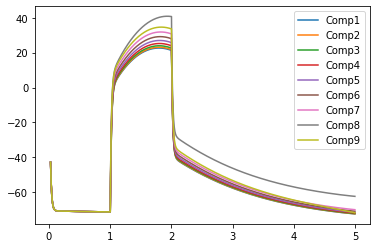

In [210]:
for j in range(len(master_arr)):
    v_arr = [master_arr[j][i][-3]*1e3 for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[5::],v_arr[5::], label= comp_names_arr[j])

mplt.legend()
#print(v_arr[-100])
print(v_arr[-1])
print(v_arr[-2])


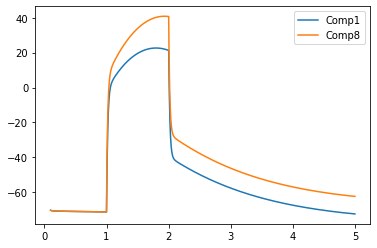

In [211]:
v_arr = [master_arr[0][i][-3]*1e3 for i in range(len(t_arr))]
mplt.plot(t_arr[20:],v_arr[20:],label='Comp1')
v_arr = [master_arr[7][i][-3]*1e3 for i in range(len(t_arr))]
mplt.plot(t_arr[20:],v_arr[20:],label='Comp8')

mplt.legend()
#v_arr = [master_arr[8][i][-3]*1e3 for i in range(len(t_arr))]
#mplt.plot(t_arr[-50:],v_arr[-50:]) i Irk. help me entirely

Comp1Terminal: Na: 13.2 K: 124.0 Cl: 5.6
Comp2Terminal: Na: 13.2 K: 124.0 Cl: 5.7
Comp3Terminal: Na: 13.3 K: 124.1 Cl: 5.7
Comp4Terminal: Na: 13.3 K: 124.2 Cl: 5.9
Comp5Terminal: Na: 13.4 K: 124.3 Cl: 6.2
Comp6Terminal: Na: 13.6 K: 124.6 Cl: 6.6
Comp7Terminal: Na: 13.9 K: 125.0 Cl: 7.2
Comp8Terminal: Na: 11.4 K: 99.4 Cl: 10.5
Comp9Terminal: Na: 13.8 K: 124.8 Cl: 7.0


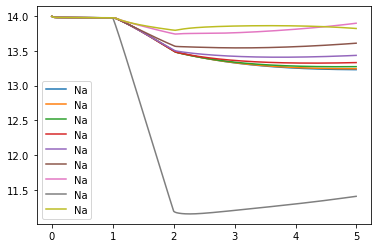

In [216]:
for j in range(0,len(master_arr)):
    na_arr = [master_arr[j][i][4]*1e3 for i in range(len(t_arr))]
    k_arr = [master_arr[j][i][5]*1e3 for i in range(len(t_arr))]
    cl_arr = [master_arr[j][i][6]*1e3 for i in range(len(t_arr))]
    x_arr = [master_arr[j][i][7]*1e3 for i in range(len(t_arr))]
    print(comp_names_arr[j] + "Terminal:"+" Na: " + str(round(na_arr[-1],1))+" K: " + str(round(k_arr[-1],1))+" Cl: " + str(round(cl_arr[-1],1)))
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[::],na_arr[::], label= 'Na')
    #mplt.plot(t_arr[::],k_arr[::], label= 'K')
    #mplt.plot(t_arr[::],cl_arr[::], label= 'Cl')
    #mplt.plot(t_arr[::],x_arr[::], label= comp_names_arr[j])

mplt.legend()

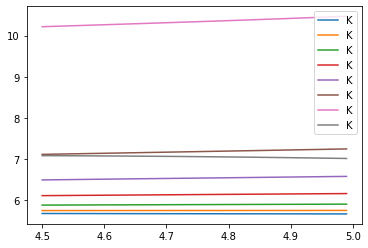

In [217]:
for j in range(1,len(master_arr)):
    na_arr = [master_arr[j][i][4]*1e3 for i in range(len(t_arr))]
    k_arr = [master_arr[j][i][5]*1e3 for i in range(len(t_arr))]
    cl_arr = [master_arr[j][i][6]*1e3 for i in range(len(t_arr))]
    x_arr = [master_arr[j][i][7]*1e3 for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[-100:-1:],cl_arr[-100:-1:], label= 'K')
    #mplt.plot(t_arr[::],k_arr[::], label= 'K')
    #mplt.plot(t_arr[::],cl_arr[::], label= 'Cl')
    #mplt.plot(t_arr[::],x_arr[::], label= comp_names_arr[j])

mplt.legend()

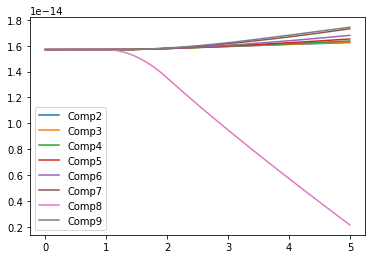

In [218]:
for j in range(1,len(master_arr)):
    vol_arr = [master_arr[j][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
    mplt.plot(t_arr[::],vol_arr[::], label= comp_names_arr[j])

mplt.legend()

In [219]:
########################################
# GUI
########################################

btn_f2d = widgets.Button(description="Plot 2d", button_style='info')
output_f2d = widgets.Output()

display(btn_f2d, output_f2d)


########################################
# BACKEND
########################################

def btn_f2d_clicked(b):
    
    total_t = intervals
    bins = 20 
    bin_intervals = round(intervals/bins)
    
    
    ########################################
    # CHLORIDE GRAPHS
    ########################################
    
    f2cl_g, [ax_cl_graph, ax_cl_tm_graph,ax_cl_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2cl_h, [ax_cl, ax_cl_tm,ax_cl_ed] = mplt.subplots(1,3, figsize=(10,5),sharex=True,sharey=True)

    cl_cmap = sns.diverging_palette(300, 140,l=50,s=100, center='dark', as_cmap=True)
    
    cl_8_arr = [master_arr[7][j][6] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    cl_4_arr = [master_arr[3][j][6] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_cl_graph.plot(t_arr, cl_8_arr,color='green',label='Comp8')
    ax_cl_graph.plot(t_arr, cl_4_arr,'--',color='green',label='Comp4')
    
    cl_8_tm_arr = [master_arr[7][j][-6] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    cl_4_tm_arr = [master_arr[3][j][-6] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_cl_tm_graph.plot(t_arr, cl_8_tm_arr,color='green',label='Comp8')
    ax_cl_tm_graph.plot(t_arr, cl_4_tm_arr,'--',color='green',label='Comp4')
    
    #######################################
    # SODIUM GRAPHS
    #######################################
    
    f2na_g, [ax_na_graph, ax_na_tm_graph,ax_na_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2na_h, [ax_na, ax_na_tm,ax_na_ed] = mplt.subplots(1,3, figsize=(10,5),sharex=False,sharey=True)
    
    na_cmap = sns.diverging_palette(240, 12,l=30,s=100, center='dark', as_cmap=True) 
    
    na_8_arr = [master_arr[7][j][4] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    na_4_arr = [master_arr[3][j][4] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_na_graph.plot(t_arr, na_8_arr,color='red',label='Comp8')
    ax_na_graph.plot(t_arr, na_4_arr,'--',color='red',label='Comp4')
    
    na_8_tm_arr = [master_arr[7][j][9] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    na_4_tm_arr = [master_arr[3][j][9] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_na_tm_graph.plot(t_arr, na_8_tm_arr,color='red',label='Comp8')
    ax_na_tm_graph.plot(t_arr, na_4_tm_arr,'--',color='red',label='Comp4')
    
    
    #######################################
    # POTASSIUM GRAPHS
    #######################################
    
    
    f2k_g, [ax_k_graph, ax_k_tm_graph,ax_k_ed_graph] = mplt.subplots(1,3, figsize=(10,5),sharex=True)
    f2k_h, [ax_k, ax_k_tm,ax_k_ed] = mplt.subplots(1,3, figsize=(10,5),sharey=True)                
     
    k_cmap = sns.diverging_palette(360, 240,l=50,s=100, center='dark', as_cmap=True)
    #f2cl_.tight_layout(pad=3.0)
    #f2na.tight_layout(pad=3.0)
    #f2k.tight_layout(pad=3.0)
    #width =0.3
    
      
    k_8_arr = [master_arr[7][j][5] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    k_4_arr = [master_arr[3][j][5] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_k_graph.plot(t_arr, k_8_arr,color='blue',label='Comp8')
    ax_k_graph.plot(t_arr, k_4_arr,'--',color='blue',label='Comp4')
    
    k_8_tm_arr = [master_arr[7][j][-10] *master_arr[7][j][3] for j in range(len(master_arr[0]))]
    k_4_tm_arr = [master_arr[3][j][-10] *master_arr[3][j][3] for j in range(len(master_arr[0]))]
    ax_k_tm_graph.plot(t_arr, k_8_tm_arr,color='blue',label='Comp8')
    ax_k_tm_graph.plot(t_arr, k_4_tm_arr,'--',color='blue',label='Comp4')
    

    
    cl_arr,na_arr, k_arr = [],[],[]
    cl_tm_arr, na_tm_arr, k_tm_arr = [], [], []
    
    for i in range(len(comp_names_arr),0,-1):
        
        temp_arr_cl = [master_arr[i-1][j][6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[::bin_intervals]
        cl_arr.append(temp_arr_cl)
        
        temp_arr_cl = [master_arr[i-1][j][-6] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_cl = temp_arr_cl[::bin_intervals]
        cl_tm_arr.append(temp_arr_cl)
        
        temp_arr_na = [master_arr[i-1][j][4] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[::bin_intervals]
        na_arr.append(temp_arr_na)
        
        temp_arr_na = [master_arr[i-1][j][9] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_na = temp_arr_na[::bin_intervals]
        na_tm_arr.append(temp_arr_na)
        
        temp_arr_k = [master_arr[i-1][j][5] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[::bin_intervals]
        k_arr.append(temp_arr_k)
        
        temp_arr_k = [master_arr[i-1][j][-10] *master_arr[i-1][j][3] for j in range(len(master_arr[0]))] 
        temp_arr_k = temp_arr_k[::bin_intervals]
        k_tm_arr.append(temp_arr_k)
    
    
    g = sns.heatmap(cl_arr,cmap="Greens",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl.set_title("Total Cl- Mols",fontsize=10)
    
    
    
    
   
 
    
    g = sns.heatmap(na_arr,yticklabels=False, cmap="Reds",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    ax_na.set_title("Total Na+ Mols",fontsize=10)
    
    g = sns.heatmap(k_arr,yticklabels=False,cmap="Blues",xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    ax_k.set_title("Total K+ Mols",fontsize=10)
    
    
    g = sns.heatmap(cl_tm_arr,cmap=cl_cmap,center=0.00,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl_tm,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl_tm.set_title("Transmembrane Cl- Mol Change",fontsize=10)
    
    g = sns.heatmap(na_tm_arr,yticklabels=False, center=0.00 ,cmap=na_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na_tm,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_upper_mid.set_yticklabels( fontsize=8, rotation=0)
    ax_na_tm.set_title("Transmembrane Na+ Mol Change",fontsize=10)
    
    
    g = sns.heatmap(k_tm_arr,yticklabels=False,center=0.00,cmap=k_cmap,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k_tm,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_upper_right.set_yticklabels(comp_names_arr[-1:0:-1], fontsize=8, rotation=0)
    ax_k_tm.set_title("Transmembrane K+ Mol Change",fontsize=10)
    
    #####################################################################################
    # ROW 3 & 4 
    #####################################################################################
    
    na_ed_arr, k_ed_arr, cl_ed_arr = [],[],[]
    
    for i in range(len(comp_names_arr)):
        
 
        if i == 8:
            na_ed = [-ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [-ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [-ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
        elif i == 0: 
            na_ed = [ED_master_arr[i][j][0] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2] /master_arr[i][j][2]for j in range(len(ED_master_arr[0]))]
        else:
            na_ed = [ED_master_arr[i][j][0]/master_arr[i][j][2] - ED_master_arr[i-1][j][0]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            k_ed = [ED_master_arr[i][j][1]/master_arr[i][j][2]- ED_master_arr[i-1][j][1]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
            cl_ed = [ED_master_arr[i][j][2]/master_arr[i][j][2] - ED_master_arr[i-1][j][2]/master_arr[i][j][2] for j in range(len(ED_master_arr[0]))]
    
        na_ed_arr.append(na_ed[::bin_intervals])
        k_ed_arr.append(k_ed[::bin_intervals])
        cl_ed_arr.append(cl_ed[::bin_intervals]) 
        
    cl_ed_arr.reverse()
    na_ed_arr.reverse()
    k_ed_arr.reverse()
        
    cl_8_ed_arr = [ED_master_arr[7][j][2]/master_arr[7][j][2] - ED_master_arr[6][j][2]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    cl_4_ed_arr = [ED_master_arr[3][j][2]/master_arr[3][j][2] - ED_master_arr[2][j][2]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_cl_ed_graph.plot(t_arr[2:], cl_8_ed_arr,color='green',label='Comp8')
    ax_cl_ed_graph.plot(t_arr[2:], cl_4_ed_arr,'--',color='green',label='Comp4')
    
    
    na_8_ed_arr = [ED_master_arr[7][j][0]/master_arr[7][j][2] - ED_master_arr[6][j][0]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    na_4_ed_arr = [ED_master_arr[3][j][0]/master_arr[3][j][2] - ED_master_arr[2][j][0]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_na_ed_graph.plot(t_arr[2:], na_8_ed_arr,color='red',label='Comp8')
    ax_na_ed_graph.plot(t_arr[2:], na_4_ed_arr,'--',color='red',label='Comp4')
    
    k_8_ed_arr = [ED_master_arr[7][j][1]/master_arr[7][j][2] - ED_master_arr[6][j][1]/master_arr[7][j][2] for j in range(len(ED_master_arr[0]))]
    k_4_ed_arr = [ED_master_arr[3][j][1]/master_arr[3][j][2] - ED_master_arr[2][j][1]/master_arr[3][j][2] for j in range(len(ED_master_arr[0]))]
    ax_k_ed_graph.plot(t_arr[2:], k_8_ed_arr,color='blue',label='Comp8')
    ax_k_ed_graph.plot(t_arr[2:], k_4_ed_arr,'--',color='blue',label='Comp4')
    
    #bound_names_arr = [comp_names_arr[i] + ' <-> ' + comp_names_arr[i+1] for i in range(len(comp_names_arr)-2,0,-1)]
    g = sns.heatmap(cl_ed_arr,cmap=cl_cmap,center=0.00,xticklabels=False,  cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_cl_ed,linewidth=0.01 )
    #g_upper_left.set_ylabel("Compartment",fontsize=10)
    g.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
    ax_cl_ed.set_title("Cl- Electrodiffusion Mol change",fontsize=10)
    
    g = sns.heatmap(na_ed_arr,cmap=na_cmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_na_ed,linewidth=0.01 )
    #g_upper_mid.set_ylabel("Compartment",fontsize=10)
    #g_lower_mid.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_na_ed.set_title("Na+ Electrodiffusion Mol change ",fontsize=10)
    
    g = sns.heatmap(k_ed_arr,cmap=k_cmap,center=0.00,xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Mol', 'orientation':'horizontal' }, ax=ax_k_ed,linewidth=0.01 )
    #g_upper_right.set_ylabel("Compartment",fontsize=10)
    #g_lower_right.set_yticklabels(bound_names_arr, fontsize=8, rotation=0)
    ax_k_ed.set_title("K+ Electrodiffusion Mol change",fontsize=10)
    
    

    sns.despine()

########################################
# IMPLEMENTATION
########################################

btn_f2d.on_click(btn_f2d_clicked)

Button(button_style='info', description='Plot 2d', style=ButtonStyle())

Output()

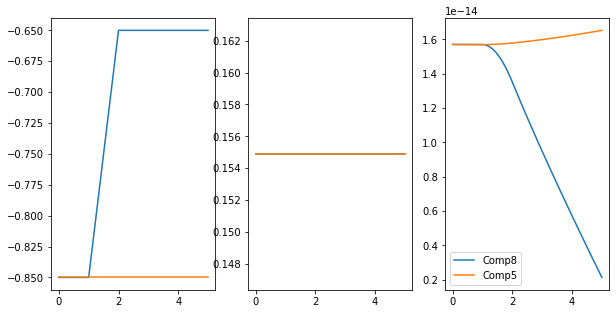

In [220]:
fig, (ax_z, ax_x, ax_vol) = mplt.subplots(1,3, figsize=(10,5))


x_arr = [master_arr[7][i][7] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_x.plot(t_arr[::],x_arr[::], label= comp_names_arr[7])
#vol_arr = [master_arr[0][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
#ax_vol.plot(t_arr[::],vol_arr[::], label= comp_names_arr[0])
x_arr = [master_arr[4][i][7] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_x.plot(t_arr[::],x_arr[::], label= comp_names_arr[4])

z_arr = [master_arr[7][i][8] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_z.plot(t_arr[::],z_arr[::], label= comp_names_arr[7])
#vol_arr = [master_arr[0][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
#ax_vol.plot(t_arr[::],vol_arr[::], label= comp_names_arr[0])
z_arr = [master_arr[4][i][8] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_z.plot(t_arr[::],z_arr[::], label= comp_names_arr[4])



vol_arr = [master_arr[7][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_vol.plot(t_arr[::],vol_arr[::], label= comp_names_arr[7])
#vol_arr = [master_arr[0][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
#ax_vol.plot(t_arr[::],vol_arr[::], label= comp_names_arr[0])
vol_arr = [master_arr[4][i][3] for i in range(len(t_arr))]
    #print(str(j) +' of '+str(len(master_arr)+' loaded'))
ax_vol.plot(t_arr[::],vol_arr[::], label= comp_names_arr[4])


ax_vol.legend()

In [221]:
for i in range(len(master_arr)):
    print(comp_names_arr[i])
    print(" start osmo: " + str(master_arr[i][0][4]+master_arr[i][0][5]+master_arr[i][0][6]+master_arr[i][0][7])+ 
          " end osmo: " + str(master_arr[i][-1][4]+master_arr[i][-1][5]+master_arr[i][-1][6]+master_arr[i][-1][7]))
for i in range(len(master_arr)):
    print(master_arr[i][-1][4]+master_arr[i][-1][5]+master_arr[i][-1][6]+master_arr[i][-1][7])
#osm_i = na + k + cl + x


Comp1
 start osmo: 0.29700000000000004 end osmo: 0.297749535773908
Comp2
 start osmo: 0.29700000000000004 end osmo: 0.29782480199269445
Comp3
 start osmo: 0.29700000000000004 end osmo: 0.29799492133488037
Comp4
 start osmo: 0.29700000000000004 end osmo: 0.29830209474326996
Comp5
 start osmo: 0.29700000000000004 end osmo: 0.2988180229552904
Comp6
 start osmo: 0.29700000000000004 end osmo: 0.2996566429796601
Comp7
 start osmo: 0.29700000000000004 end osmo: 0.30099735604144184
Comp8
 start osmo: 0.29700000000000004 end osmo: 0.27615286493982005
Comp9
 start osmo: 0.29700000000000004 end osmo: 0.3005257656544865
0.297749535773908
0.29782480199269445
0.29799492133488037
0.29830209474326996
0.2988180229552904
0.2996566429796601
0.30099735604144184
0.27615286493982005
0.3005257656544865
